## Bank account ownership analysis using Finscope data

### Defining the Question

#### a) Specifying the data analysis question

What are the characteristics of individuals that mostly influence access or ownership of bank accounts.

#### b) Metrics of success

*   To identify the characteristics and categories of individuals who are most likely to have or use a bank account
*   Determine the state of financial inclusion in selected countries based on number of individuals with bank accounts
*   Identify key demographic factors that influence whether an individual has a bank account or not.






#### c) Understanding the context
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.



#### d) Recording Experimental Design



- Define research question
- Data Exploration
- Univariate analysis
- Bivariate Analysis
- Multivariate Analysis
- Summary of Findings
- Challenging the solution
  


#### e) Relevance of the data

The data used for analysis contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018 and is relevant for analysis.

### Data Exploration

####Loading the dataset

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the variable definitions dataset
df_definitions = pd.read_csv('http://bit.ly/VariableDefinitions')
df_definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [3]:
#loading our finance dataset
df_finance = pd.read_csv('http://bit.ly/FinancialDataset')

#### Checking the data

In [4]:
df_finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
df_finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
df_finance.sample(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
601,Kenya,2018,uniqueid_602,No,Urban,Yes,4.0,42.0,Male,Head of Household,Married/Living together,Primary education,Informally employed
22826,Uganda,2018,uniqueid_1404,No,Urban,No,3.0,65.0,Male,Head of Household,Divorced/Seperated,Primary education,Other Income
17707,Tanzania,2017,uniqueid_2905,Yes,Urban,Yes,1.0,29.0,Female,Head of Household,Single/Never Married,Vocational/Specialised training,Formally employed Private
10798,Rwanda,2016,uniqueid_4731,No,Rural,No,6.0,45.0,Female,Spouse,Married/Living together,Primary education,Informally employed
7518,Rwanda,2016,uniqueid_1451,No,Rural,Yes,6.0,56.0,Female,Spouse,Married/Living together,No formal education,Farming and Fishing


In [7]:
df_finance.shape

(23524, 13)

In [8]:
df_finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [9]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [10]:
df_finance.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


#### Data Cleaning

In [11]:
#checking for duplicates
df_finance.duplicated().sum()

0

In [12]:
#Checking for missing data
df_finance.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [13]:
#Drop all missing values
df_finance.dropna(inplace=True)

In [14]:
df_finance.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [15]:
#drop Idcolumn as we will not need it
df_finance.drop(columns='uniqueid', inplace=True)

In [16]:
df_definitions.describe

<bound method NDFrame.describe of       Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal educatio...
11                job_type  Ty

In [17]:
df_finance.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [18]:
#Renaming column names
dict={'Level of Educuation':'education_level', 'Respondent Age':'age_of_respondent','Has a Bank account':'has_a_bank_account','Type of Location':'location_type','Cell Phone Access':'cellphone_access','The relathip with head':'relationship_with_head','Type of Job':'job_type'}
df_finance.rename(columns=dict,inplace = True)

In [19]:
df_finance.columns

Index(['country', 'year', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [20]:
#Checking for anomalies
for col in df_finance.columns.to_list():
  print(f'{col} column unique values: ')
  print(df_finance[col].unique(), end='\n\n')

country column unique values: 
['Kenya' 'Rwanda' 'Tanzania' 'Uganda']

year column unique values: 
[2018 2029 2056 2016 2039 2017]

has_a_bank_account column unique values: 
['Yes' 'No']

location_type column unique values: 
['Rural' 'Urban']

cellphone_access column unique values: 
['Yes' 'No']

household_size column unique values: 
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]

age_of_respondent column unique values: 
[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.  99.
 100.]

gender_of_respondent column unique values: 
['Female' 'Male']

relationship_with_head column unique v

Anomalies in education_level  and year columns seen

In [21]:
#Check anomalies in year column
df_finance[df_finance['year'].isin([2029,2056,2039])]

,country,year,has_a_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
213,Kenya,2029,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [22]:
#Remove  year anomalies
anomalies_years = df_finance[df_finance['year'].isin([2029,2056,2039])].index
df_finance.drop(index=anomalies_years, inplace=True)

In [23]:
#Remove anomalies in education_level column
anomalies_education = df_finance[df_finance['education_level']== '6'].index
df_finance.drop(index=anomalies_education, inplace=True)

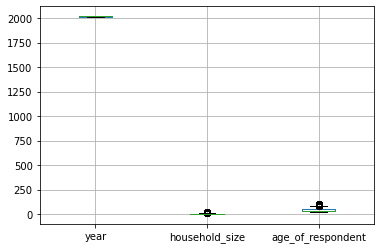

In [24]:
#Check for outliers
df_finance.boxplot()

In [25]:
num_fincols = df_finance[['household_size','age_of_respondent']]
Q1 = num_fincols.quantile(0.25)
Q3 = num_fincols.quantile(0.75)
IQR = Q3 -Q1


In [26]:
#Get the rows with outliers
outliers = num_fincols[(num_fincols < (Q1 - 1.5 * IQR))|(num_fincols > (Q3 + 1.5 * IQR))].any(axis=1)
index = outliers[outliers.values == True].index
df_finance[df_finance.index.isin(index)]

,country,year,has_a_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
34,Kenya,2018,No,Rural,Yes,10.0,42.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
58,Kenya,2018,No,Rural,Yes,11.0,21.0,Male,Child,Single/Never Married,Other/Dont know/RTA,Informally employed
92,Kenya,2018,Yes,Urban,Yes,10.0,21.0,Female,Parent,Single/Never Married,Tertiary education,Remittance Dependent
100,Kenya,2018,No,Urban,Yes,10.0,23.0,Female,Other relative,Divorced/Seperated,Primary education,Formally employed Private
209,Kenya,2018,No,Rural,No,3.0,95.0,Female,Parent,Widowed,No formal education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23461,Uganda,2018,No,Urban,Yes,13.0,25.0,Female,Spouse,Married/Living together,Primary education,Dont Know/Refuse to answer
23468,Uganda,2018,No,Urban,Yes,12.0,42.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23471,Uganda,2018,No,Rural,Yes,15.0,17.0,Female,Other relative,Married/Living together,Secondary education,Self employed
23482,Uganda,2018,No,Rural,No,10.0,18.0,Female,Parent,Married/Living together,Secondary education,Self employed


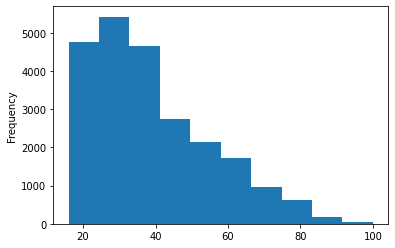

In [27]:
df_finance['age_of_respondent'].plot.hist()

Our outliers seem not to affect our data distribution so we will not remove them

###Univariate Analysis

In [28]:
#Ratio of distribution of the people that have a bank account and dont
df_finance['has_a_bank_account'].value_counts(normalize=True)*100

No     85.883413
Yes    14.116587
Name: has_a_bank_account, dtype: float64

We can see that less people have bank account compared to those who have hence the need to analyse their data and gather chaacteristics likely to influencing access

In [29]:
df_finance[['household_size','age_of_respondent']].describe()

,household_size,age_of_respondent
count,23313.000000,23313.000000
mean,3.688414,38.793549
std,2.280842,16.510611
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [30]:
print(df_finance['age_of_respondent'].mean())
print(df_finance['age_of_respondent'].sort_values(ascending=False).median())
print(df_finance['age_of_respondent'].mode())

38.79354866383563
35.0
0    30.0
dtype: float64


In [31]:
print(df_finance['household_size'].mean())
print(df_finance['household_size'].sort_values(ascending=False).median())
print(df_finance['household_size'].mode())

3.688414189508
3.0
0    2.0
dtype: float64


In [32]:
#Finding range of age distribution
print((df_finance['age_of_respondent'].max())-(df_finance['age_of_respondent'].min()))

84.0


In [33]:
#Finding range of household distribution
print((df_finance['household_size'].max())-(df_finance['household_size'].min()))

21.0


In [34]:
#skewness
df_finance['age_of_respondent'].skew()
#The age variable is moderately positively skewed.

0.8412764239448531

In [35]:
df_finance['household_size'].skew()
#Household variable has a moderate positive skewness. 

0.9737983207814955

In [36]:
#kurtosis
df_finance['age_of_respondent'].kurt()
#The data is platykurtic

0.10122691422605756

In [37]:
df_finance['household_size'].kurt()
#The distribution is also platykurtic

1.1530073057375057

In [38]:
df_finance['age_of_respondent'].std()

16.510610642873882

In [39]:
df_finance['household_size'].std()

2.2808421547364386

In [40]:
df_finance['age_of_respondent'].var()

272.6002638005803

In [41]:
df_finance['household_size'].var()

5.202240934822759

In [42]:
df_finance['age_of_respondent'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: age_of_respondent, dtype: float64

In [43]:
df_finance['household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

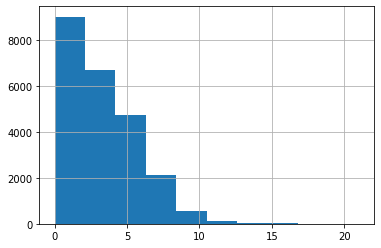

In [44]:
df_finance['household_size'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Household Size Distribution')

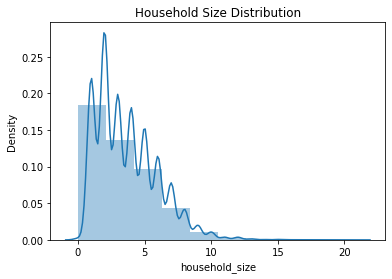

In [45]:
sns.distplot(df_finance['household_size'], bins=10)
plt.title('Household Size Distribution')

Text(0.5, 1.0, 'Respondent age distribution')

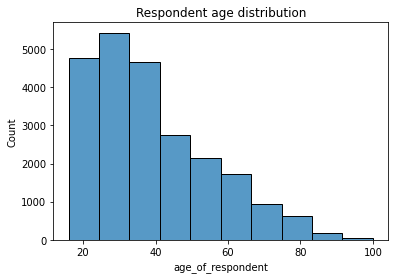

In [46]:
sns.histplot(df_finance['age_of_respondent'], bins=10)
plt.title('Respondent age distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Respondent Distribution')

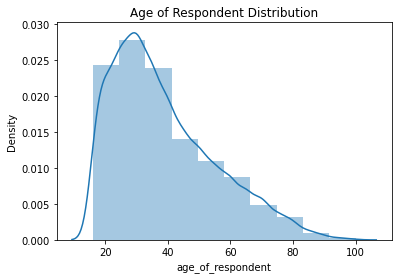

In [47]:
sns.distplot(df_finance['age_of_respondent'], bins=10)
plt.title('Age of Respondent Distribution')

In [48]:
#Frequency distribution for all the categorical Variables
categorical_var = df_finance.select_dtypes(include='object').columns.to_list()
for col in categorical_var:
  print(f'Column: {col}')
  print(df_finance[col].value_counts().sort_values(ascending=False))
  print('\n')

Column: country
Rwanda      8665
Tanzania    6497
Kenya       6062
Uganda      2089
Name: country, dtype: int64


Column: has_a_bank_account
No     20022
Yes     3291
Name: has_a_bank_account, dtype: int64


Column: location_type
Rural    14247
Urban     9066
Name: location_type, dtype: int64


Column: cellphone_access
Yes    17315
No      5998
Name: cellphone_access, dtype: int64


Column: gender_of_respondent
Female    13748
Male       9565
Name: gender_of_respondent, dtype: int64


Column: relationship_with_head
Head of Household      12714
Spouse                  6459
Child                   2221
Parent                  1069
Other relative           661
Other non-relatives      189
Name: relationship_with_head, dtype: int64


Column: marital_status
Married/Living together    10682
Single/Never Married        7899
Widowed                     2677
Divorced/Seperated          2047
Dont know                      8
Name: marital_status, dtype: int64


Column: education_level
Primary edu

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Country data distribution')

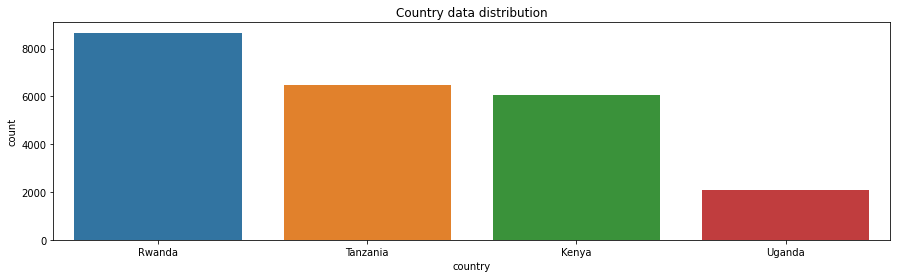

In [49]:
plt.figure(figsize=(15, 4))
sns.countplot(df_finance['country'].dropna(), order = df_finance['country'].value_counts().index);
plt.title('Country data distribution')

###Bivariate Analysis

In [50]:
df_finance.columns

Index(['country', 'year', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

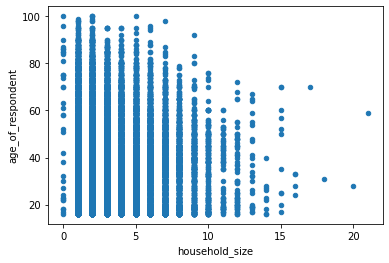

In [51]:
#Scatterplot for household size and age(numeriv features)
df_finance.plot(x = 'household_size', y = 'age_of_respondent', kind = 'scatter')

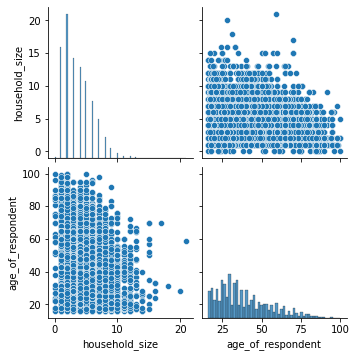

In [52]:
## Determine correlation between numeric features
sns.pairplot(df_finance[['household_size','age_of_respondent']])
# plt.title('Respondent Age vs Household Size')

In [53]:
df_finance['age_of_respondent'].corr(df_finance['household_size'])

-0.11918485538538871

The two numeric variables age and household size are weakly negatively correlated

In [54]:
df_finance.columns

Index(['country', 'year', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

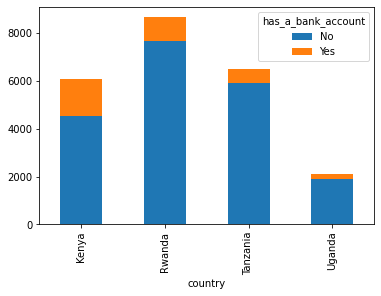

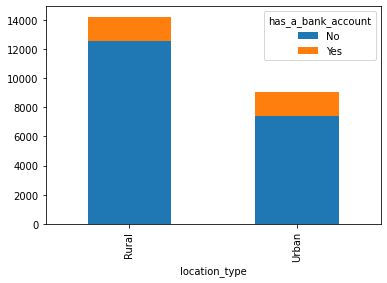

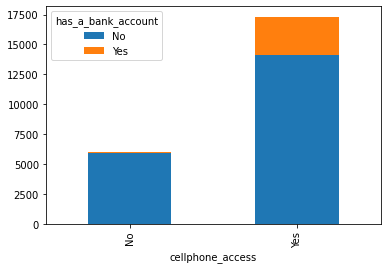

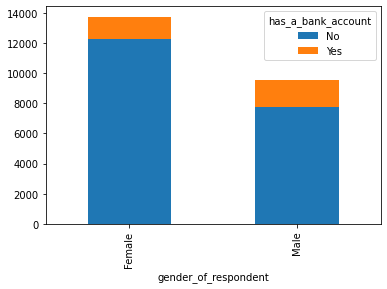

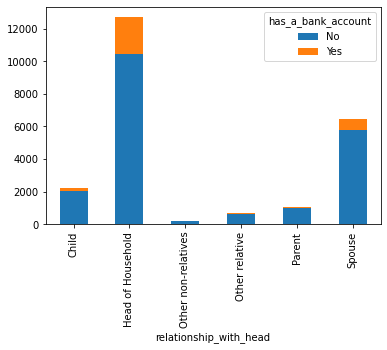

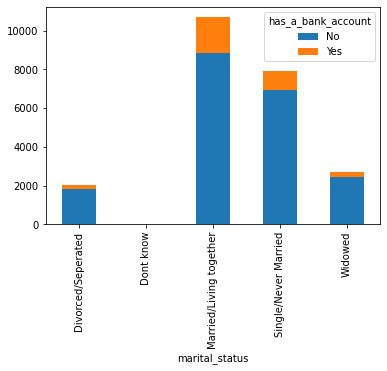

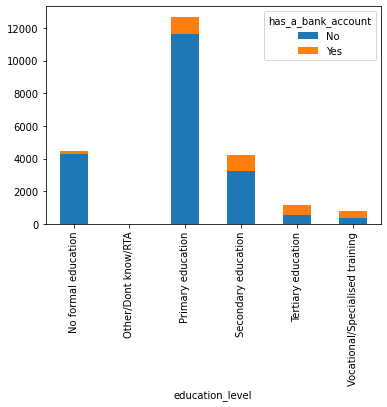

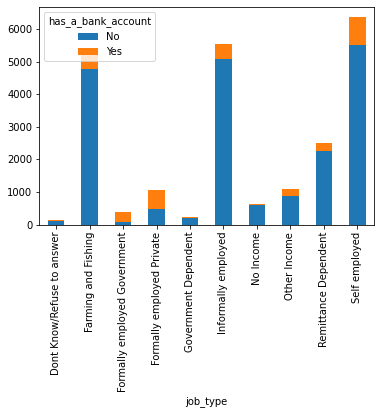

In [55]:
col_names =['country', 'location_type', 'cellphone_access','gender_of_respondent','relationship_with_head','marital_status','education_level','job_type']

for i, col_val in enumerate(col_names):

    df_finance.groupby(df_finance[col_val])['has_a_bank_account'].value_counts().unstack().plot.bar(stacked=True)
    
plt.show();

# df_finance.groupby('country')['has_a_bank_account'].value_counts().unstack().plot.bar(stacked=True)

In [56]:
# Identify indices with don't know/ refuse to answer responses and drop them
index_marital_status = df_finance[df_finance['marital_status'] == 'Dont know'].index.to_list()
index_education = df_finance[df_finance['education_level'] == 'Other/Dont know/RTA'].index.to_list()
index_job = df_finance[df_finance['job_type'] == 'Dont Know/Refuse to answer'].index.to_list()

to_drop = set(index_education + index_marital_status + index_job)
# Drop rows with those indices
df_finance.drop(index=to_drop, inplace=True)

In [57]:
categorical_cols = df_finance.select_dtypes(include ='object').columns.to_list()
categorical_cols

['country',
 'has_a_bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [58]:
# # Crosstablating  between Type of Job and having a bank account
jobcrosstab = pd.crosstab(df_finance['has_a_bank_account'], df_finance['job_type'])
jobcrosstab

job_type,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
has_a_bank_account,,,,,,,,,
No,4787,87,480,197,5092,602,880,2266,5512
Yes,634,297,564,49,438,13,194,239,841


In [59]:
countrycrosstab = pd.crosstab(df_finance['has_a_bank_account'], df_finance['country'])
countrycrosstab

country,Kenya,Rwanda,Tanzania,Uganda
has_a_bank_account,,,,
No,4533,7625,5899,1846
Yes,1510,985,598,176


In [60]:
edulevelcrosstab = pd.crosstab(df_finance['has_a_bank_account'], df_finance['education_level'])
edulevelcrosstab

education_level,No formal education,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
has_a_bank_account,,,,,
No,4273,11529,3202,554,345
Yes,176,1078,973,587,455


In [61]:
#col_names =['country', 'location_type', 'cellphone_access','gender_of_respondent','relationship_with_head','marital_status','education_level','job_type']

In [62]:
gendercrosstab = pd.crosstab(df_finance['has_a_bank_account'], df_finance['gender_of_respondent'])
gendercrosstab

gender_of_respondent,Female,Male
has_a_bank_account,,
No,12196,7707
Yes,1468,1801


In [63]:
locationcrosstab = pd.crosstab(df_finance['has_a_bank_account'], df_finance['location_type'])
locationcrosstab

location_type,Rural,Urban
has_a_bank_account,,
No,12494,7409
Yes,1652,1617


In [64]:
cellphonecrosstab = pd.crosstab(df_finance['has_a_bank_account'], df_finance['cellphone_access'])
cellphonecrosstab

cellphone_access,No,Yes
has_a_bank_account,,
No,5861,14042
Yes,104,3165


In [65]:
maritalstatuscrosstab = pd.crosstab(df_finance['has_a_bank_account'], df_finance['marital_status'])
maritalstatuscrosstab

marital_status,Divorced/Seperated,Married/Living together,Single/Never Married,Widowed
has_a_bank_account,,,,
No,1809,8756,6918,2420
Yes,232,1846,951,240


In [66]:
headrlshpcrosstab = pd.crosstab(df_finance['has_a_bank_account'], df_finance['relationship_with_head'])
headrlshpcrosstab

relationship_with_head,Child,Head of Household,Other non-relatives,Other relative,Parent,Spouse
has_a_bank_account,,,,,,
No,2016,10394,169,593,997,5734
Yes,190,2239,20,65,65,690


In [67]:
#T-Test
from scipy.stats import ttest_ind
x= df_finance['has_a_bank_account'].value_counts()
y= df_finance['education_level'].value_counts()

t_statistic, p_value = ttest_ind(x, y)
# Then displaying the t-statistic and p value
print("P Value",p_value)
print(" T statistic",t_statistic)

P Value 0.27424442703906415
 T statistic 1.2275717079174004


In [68]:
# Perform chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
 
stat, p, dof, expected = chi2_contingency(jobcrosstab.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

#our result shows p-value less than alpha, thus significant evidence to reject null hypothesis which is that typeofjob has no influence on accessing a bank account

Propability: 0.95, Critical value: 15.50731305586545, Test statistic: 2981.47928994802
Alpha: 0.050000000000000044, p-value: 0.0


In [69]:
stat, p, dof, expected = chi2_contingency(edulevelcrosstab.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

#our result shows p-value is less than alpha, test statistic 
#exceed the critical value thus reject the null hypothesis. which is that
#country has no influence on accessing a bank account

Propability: 0.95, Critical value: 9.487729036781154, Test statistic: 3511.46942026072
Alpha: 0.050000000000000044, p-value: 0.0


In [70]:
stat, p, dof, expected = chi2_contingency(locationcrosstab.to_numpy())

#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p:.5f}')

#reject location has no influence in accessing baank 

Propability: 0.95, Critical value: 3.841458820694124, Test statistic: 176.36159026650915
Alpha: 0.050000000000000044, p-value: 0.00000


In [71]:
stat, p, dof, expected = chi2_contingency(cellphonecrosstab.to_numpy())

#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')
#reject that cellphone has no influence on accessing bank account

Propability: 0.95, Critical value: 3.841458820694124, Test statistic: 1012.0316935814733
Alpha: 0.050000000000000044, p-value: 4.355368558242013e-222


In [72]:
stat, p, dof, expected = chi2_contingency(gendercrosstab.to_numpy())

#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

#reject that gender has no influence on accessing bank account

Propability: 0.95, Critical value: 3.841458820694124, Test statistic: 310.31891158097494
Alpha: 0.050000000000000044, p-value: 1.861024387194316e-69


In [73]:
# Perform a two sample z test
from statsmodels.stats.weightstats import ztest

rand_sample = df_finance[['age_of_respondent', 'has_a_bank_account']].sample(n=50, random_state=1)
zscore, p = ztest(x1 = rand_sample[rand_sample['has_a_bank_account']=='Yes']['age_of_respondent'].values, x2=rand_sample[rand_sample['has_a_bank_account']=='No']['age_of_respondent'].values)
print(f'Test statistic: {zscore}, p-value: {p}')

Test statistic: 0.3295894215857208, p-value: 0.7417102167332039


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


P-value is greater than significance level of 0.05, hence we fail to reject the null hypothesis.(Age of respondent has no influence in bank access)

In [74]:
rand_sample_2 = df_finance[['household_size', 'has_a_bank_account']].sample(n=50, random_state=1)
zscore, p = ztest(x1 = rand_sample_2[rand_sample_2['has_a_bank_account']=='Yes']['household_size'].values, x2=rand_sample_2[rand_sample_2['has_a_bank_account']=='No']['household_size'].values)
print(f'Test statistic: {zscore}, p-value: {p}')


Test statistic: -2.1169345556762202, p-value: 0.03426540243096731


P-value is less than significance level of 0.05, hence we reject the null hypothesis.(Household has no influence in bank access)

###Multivariate Analysis

In [75]:
#instal resourcepy
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [76]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_finance)
chi_square_value, p_value


(406.95532446051647, 6.054914558957559e-51)

our test is statistically significant(close to zero)

In [77]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df_finance, 3, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.124193
1,1.012908
2,0.862899


In [78]:
df_finance.columns

Index(['country', 'year', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

Text(0.5, 1.0, 'Respondents with no bank accounts')

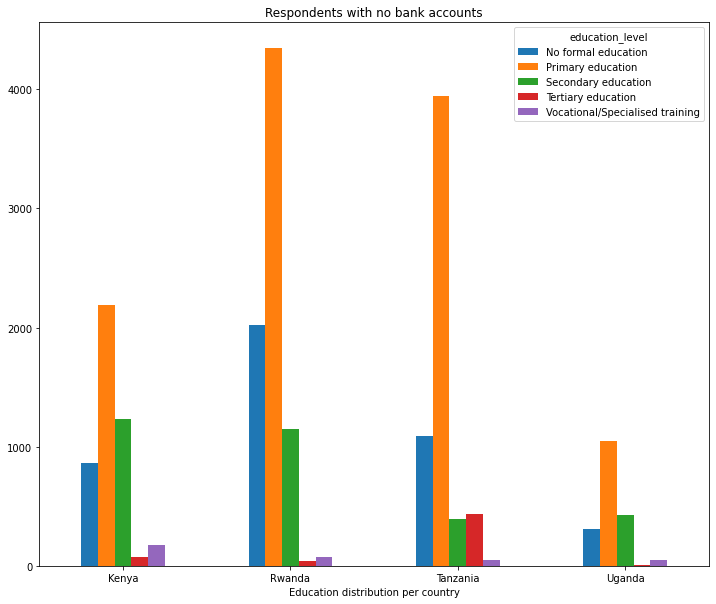

In [79]:
#relationship between country, level of education and bank account status
country_education = pd.crosstab(index=[df_finance['has_a_bank_account'],df_finance['country']], columns=df_finance['education_level'])

country_education.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education distribution per country')
plt.title('Respondents with no bank accounts')


In all countries, the level of education with the highest number of respondents with no bank accounts is primary education.

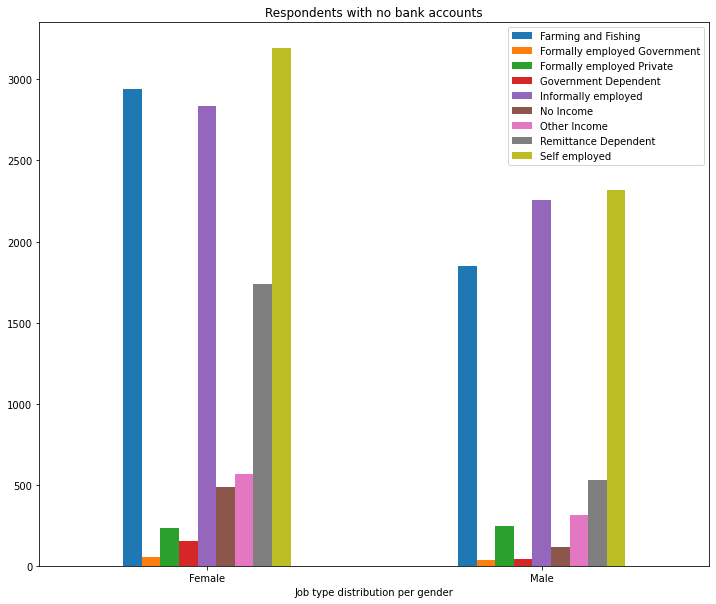

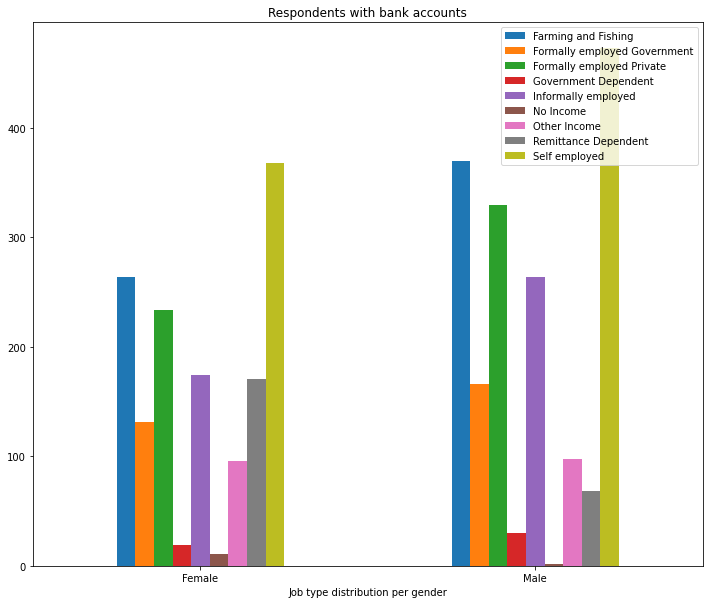

In [80]:
#relationship between gender, type of job and bank account status
gender_job = pd.crosstab(index=[df_finance['has_a_bank_account'],df_finance['gender_of_respondent']], columns=df_finance['job_type'])

gender_job.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Female', 'Male'], rotation=0)
plt.xlabel('Job type distribution per gender')
plt.title('Respondents with no bank accounts')
plt.legend(loc='upper right')

gender_job.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Female', 'Male'], rotation=0)
plt.xlabel('Job type distribution per gender')
plt.title('Respondents with bank accounts')
plt.legend(loc='upper right')

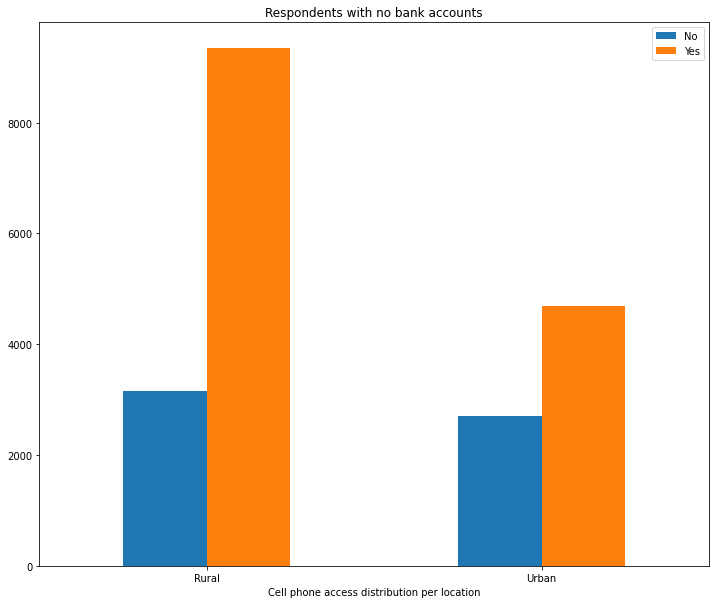

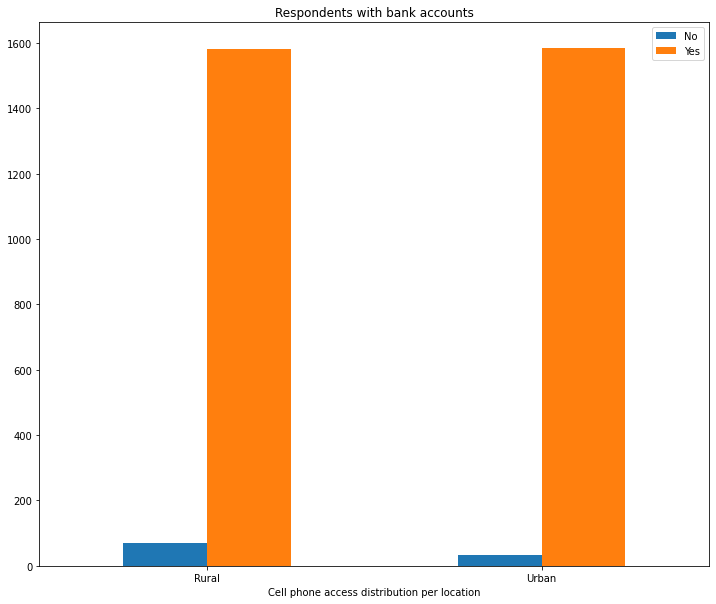

In [81]:
#relationship between cell access, location and bank account status

location_cellphone = pd.crosstab(index=[df_finance['has_a_bank_account'],df_finance['location_type']], columns=df_finance['cellphone_access'])
location_cellphone.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Rural','Urban'], rotation=0)
plt.xlabel('Cell phone access distribution per location')
plt.title('Respondents with no bank accounts')
plt.legend(loc='upper right')

location_cellphone = pd.crosstab(index=[df_finance['has_a_bank_account'],df_finance['location_type']], columns=df_finance['cellphone_access'])
location_cellphone.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Rural','Urban'], rotation=0)
plt.xlabel('Cell phone access distribution per location')
plt.title('Respondents with bank accounts')
plt.legend(loc='upper right')

###Implementing the solution
- People with no bank accounts are higher(85.88%) in comparison to those with bank accounnts
- Categorical variables influence ownership of bank accounts.
These include:
- country,
- location_type,
- cellphone_access,
- gender_of_respondent,
- relationship_with_head,
- marital_status,
- education_level,
- job_type'
- Age of respondent does not influence owneship of bank accounts however household size does
- Our data is highly imbalanced

###Challenging the solution
To encourage and advertise more to all ages of people to access bank accounts <br>
To create a balance in bank account ownership with all features.